In [31]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [32]:
DATA_DIR = r"/home/karthik/projects/circuitguard/dataset/PCBData"

In [33]:
groups = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))]
print("Total groups:", len(groups))
print("First few groups:", groups[:5])

Total groups: 11
First few groups: ['group12000', 'group90100', 'group44000', 'group12100', 'group92000']


In [38]:
import os, glob, cv2

DATA_DIR = "/home/karthik/projects/circuitguard/dataset/PCBData"
group = os.path.join(DATA_DIR, "group00041")  # pick a group with both template and test images
print("Using group:", group)

template_files = []
test_files = []

for sub in os.listdir(group):
    sub_path = os.path.join(group, sub)
    if os.path.isdir(sub_path):
        jpg_files = [f for f in glob.glob(os.path.join(sub_path, "*.jpg")) if os.path.getsize(f) > 0]
        for f in jpg_files:
            if "_test.jpg" in f:
                test_files.append(f)
            elif "_temp.jpg" in f:
                template_files.append(f)

if not template_files:
    raise FileNotFoundError(f"No template images found in {group}")
if not test_files:
    raise FileNotFoundError(f"No test images found in {group}")

# Pick first template and test image
template_path = template_files[0]
test_path     = test_files[0]

# Load images into variables
template = cv2.imread(template_path, 0)
test     = cv2.imread(test_path, 0)

print("Template image:", template_path)
print("Test image:", test_path)


Using group: /home/karthik/projects/circuitguard/dataset/PCBData/group00041
Template image: /home/karthik/projects/circuitguard/dataset/PCBData/group00041/00041/00041028_temp.jpg
Test image: /home/karthik/projects/circuitguard/dataset/PCBData/group00041/00041/00041115_test.jpg


In [39]:
# %%
test_resized = cv2.resize(test, (template.shape[1], template.shape[0]))
diff = cv2.absdiff(template, test_resized)


In [40]:
 # %%
template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
test     = cv2.imread(test_path, cv2.IMREAD_GRAYSCALE)


In [41]:
print(f"Templates found ({len(template_files)}):", template_files)
print(f"Test images found ({len(test_files)}):", test_files)



Templates found (221): ['/home/karthik/projects/circuitguard/dataset/PCBData/group00041/00041/00041028_temp.jpg', '/home/karthik/projects/circuitguard/dataset/PCBData/group00041/00041/00041126_temp.jpg', '/home/karthik/projects/circuitguard/dataset/PCBData/group00041/00041/00041014_temp.jpg', '/home/karthik/projects/circuitguard/dataset/PCBData/group00041/00041/00041166_temp.jpg', '/home/karthik/projects/circuitguard/dataset/PCBData/group00041/00041/00041204_temp.jpg', '/home/karthik/projects/circuitguard/dataset/PCBData/group00041/00041/00041081_temp.jpg', '/home/karthik/projects/circuitguard/dataset/PCBData/group00041/00041/00041216_temp.jpg', '/home/karthik/projects/circuitguard/dataset/PCBData/group00041/00041/00041209_temp.jpg', '/home/karthik/projects/circuitguard/dataset/PCBData/group00041/00041/00041151_temp.jpg', '/home/karthik/projects/circuitguard/dataset/PCBData/group00041/00041/00041075_temp.jpg', '/home/karthik/projects/circuitguard/dataset/PCBData/group00041/00041/000411

In [42]:
# %%
_, mask = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


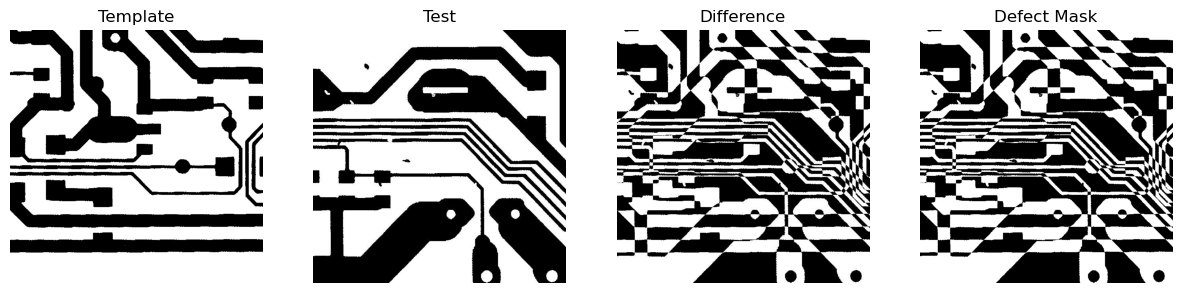

In [43]:
# %%
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].imshow(template, cmap='gray'); axs[0].set_title("Template"); axs[0].axis("off")
axs[1].imshow(test, cmap='gray'); axs[1].set_title("Test"); axs[1].axis("off")
axs[2].imshow(diff, cmap='gray'); axs[2].set_title("Difference"); axs[2].axis("off")
axs[3].imshow(mask, cmap='gray'); axs[3].set_title("Defect Mask"); axs[3].axis("off")
plt.show()
